<a href="https://colab.research.google.com/github/yimeiwen/polymer/blob/main/Polymer_Melt_Flow_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('algo.csv')
df.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2564 non-null   object 
 1   513FC31103.pv    2486 non-null   float64
 2   513HC31114-5.mv  2560 non-null   float64
 3   513PC31201.pv    2484 non-null   float64
 4   513LC31202.pv    2484 non-null   float64
 5   513FC31409.pv    2484 non-null   float64
 6   513FC31114-5.pv  2486 non-null   float64
 7   513TC31220.pv    2484 non-null   float64
 8   MFR              2564 non-null   float64
dtypes: float64(8), object(1)
memory usage: 180.4+ KB


In [4]:
df.duplicated

<bound method DataFrame.duplicated of             Unnamed: 0  513FC31103.pv  513HC31114-5.mv  513PC31201.pv  \
0       04-05-18 19:45      24856.584            0.153      30.414835   
1       04-05-18 21:45      25537.250            0.153      30.527121   
2       04-05-18 23:45      25689.266            0.153      30.356180   
3        04-06-18 1:45      25098.754            0.153      30.894308   
4        04-06-18 3:45      24853.941            0.150      30.680647   
...                ...            ...              ...            ...   
2559     12-10-18 9:45      24437.988            0.185      31.025928   
2560  12/17/2018 16:45            NaN              NaN            NaN   
2561  12/17/2018 18:45            NaN              NaN            NaN   
2562   12/27/2018 5:45            NaN              NaN            NaN   
2563  12/31/2018 23:45            NaN            0.000            NaN   

      513LC31202.pv  513FC31409.pv  513FC31114-5.pv  513TC31220.pv   MFR  
0         

Feed Rate, Hydrogen to C3 ratio, Reactor Pressure（bar）, Reactor Bed Level,ethylene(C2) flow rate(kg/hr),catalyst feed rate, reactor temperature, m

In [5]:
df.columns=['Time','C3=','H2R','Pressure','Level','C2=','Cat','Temp','MFR']
data=df.dropna()
data.head()

,Time,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [6]:
import pandas as pd
!pip install pandas-profiling
from pandas_profiling import ProfileReport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
profile=ProfileReport(df)
profile.to_widgets()

TypeError: ignored

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
del data['Time']
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


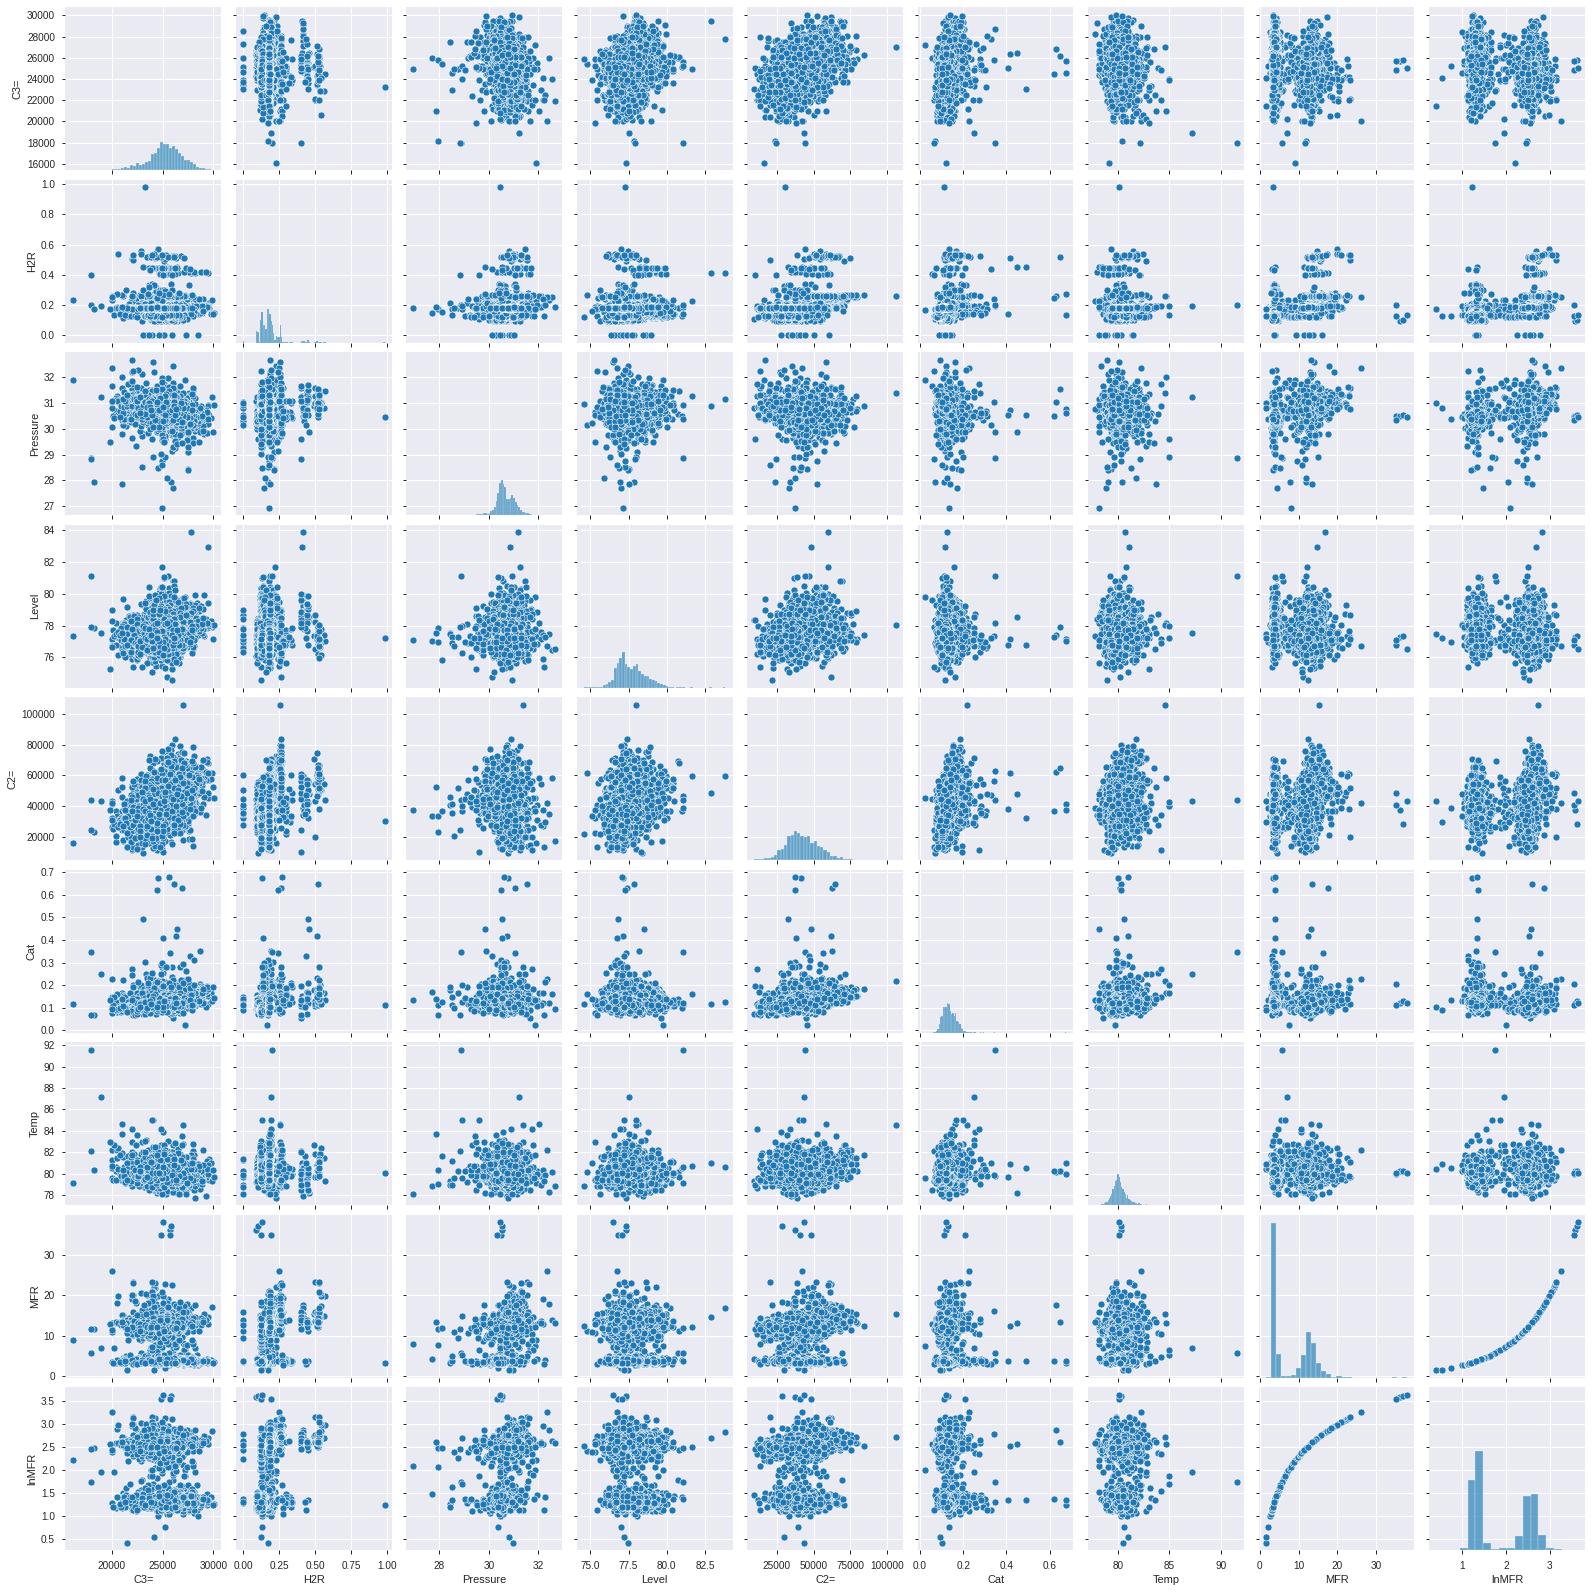

In [9]:

data['lnMFR']=np.log(data['MFR'].values)
sns.pairplot(data)
plt.show()


In [ ]:
len(data)

2484

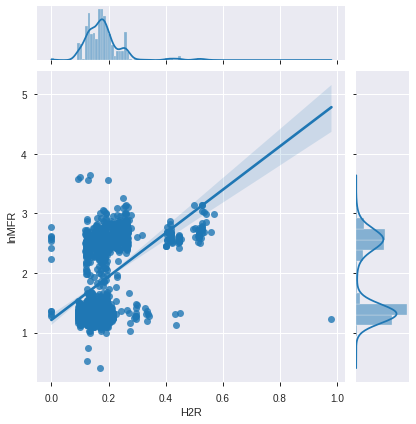

In [10]:
# a joint plot shows two variables, with the univariate and joint distributions
sns.jointplot(x='H2R',y='lnMFR', data=data,kind='reg')

plt.show()

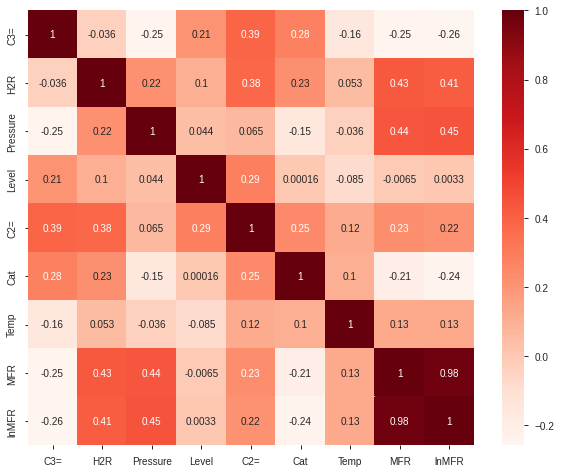

In [11]:
plt.figure(figsize=(10,8))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

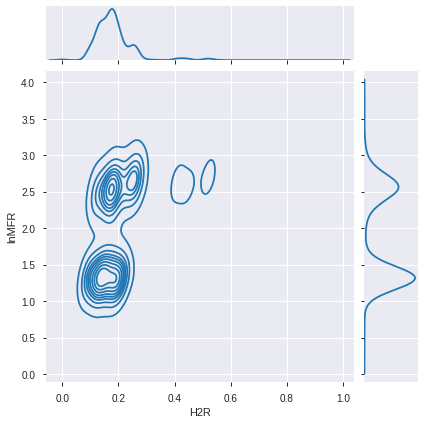

In [12]:
sns.jointplot(x='H2R',y='lnMFR', data=data,kind='kde')


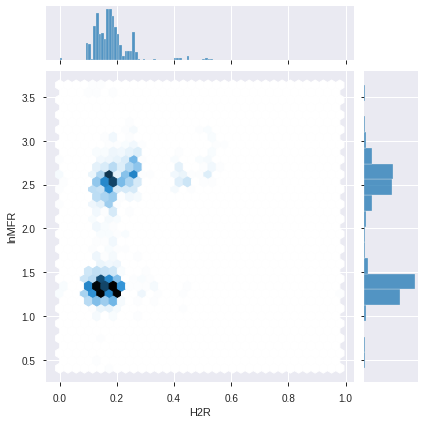

In [ ]:
sns.jointplot(x='H2R',y='lnMFR', data=data,kind='hex')

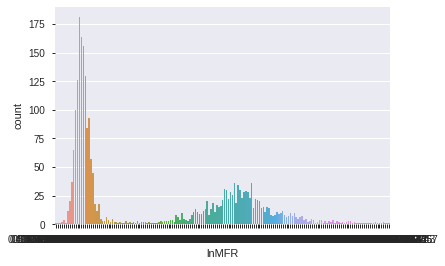

In [ ]:
sns.countplot(x=data['lnMFR'])

Prepare data for analysis

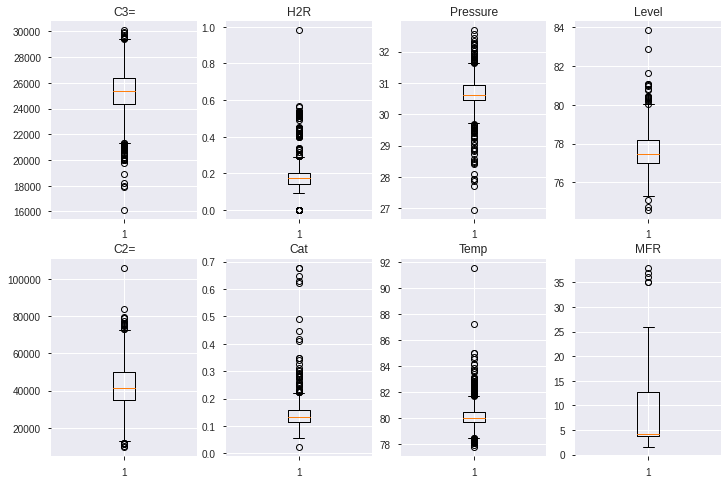

In [ ]:
plt.figure(figsize=(12,8))

for i,c in enumerate(data.columns):
  if i<8:
    plt.subplot(2,4,i+1)
    plt.title(c)
    plt.boxplot(data[c])
plt.show()

In [13]:
data=data[data['H2R']<0.7]
data=data[data['H2R']>0.01]
data=data[data['MFR']<30]
data=data[data['Temp']<86]

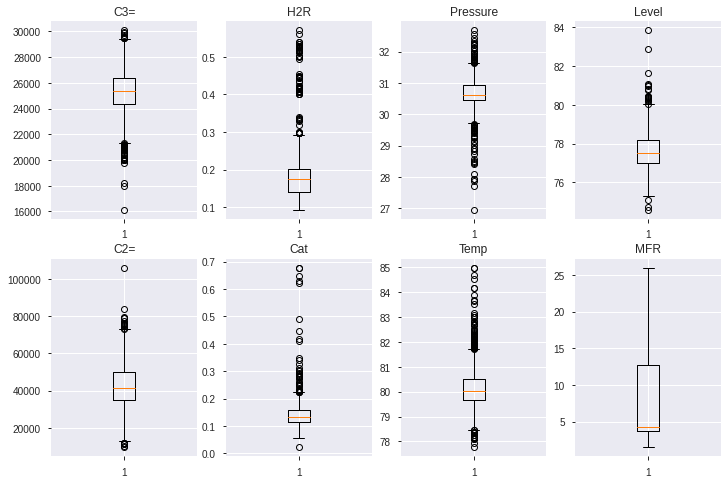

In [14]:
plt.figure(figsize=(12,8))

for i,c in enumerate(data.columns):
  if i<8:
    plt.subplot(2,4,i+1)
    plt.title(c)
    plt.boxplot(data[c])
plt.show()

In [15]:
del data['MFR']
data.head()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,lnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,1.193922


In [16]:
from sklearn.preprocessing import StandardScaler

ds=StandardScaler().fit_transform(data)

In [17]:
ds=pd.DataFrame(ds,columns=data.columns)
ds.head()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,lnMFR
0,-0.268131,-0.450737,-0.590701,2.185388,0.731645,0.611345,0.335870,-1.034531
1,0.132976,-0.450737,-0.324968,0.959542,-0.027916,-0.210319,-1.641075,-1.130444
2,0.222556,-0.450737,-0.729512,1.297272,0.245752,0.275732,-1.696611,-1.130444
3,-0.125423,-0.450737,0.544005,1.657699,0.046730,0.312680,-1.433659,-1.180673
4,-0.269688,-0.493914,0.038362,1.117162,-0.188751,-0.381996,-1.413401,-1.081760


In [18]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(ds,test_size=0.2,shuffle=True)

In [19]:
# pickle to save as proflie

import pickle
info=[data,train,test,ds]
with open('mfr_data.plk','wb') as handle:
  pickle.dump(info,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
from typing import ValuesView
x=data['H2R'].values
z=data['lnMFR'].values
p1=np.polyfit(x,z,1)


In [21]:
p=np.polyfit(x,z,1)
print('Slope,Intercept:' +str(p1))

Slope,Intercept:[4.07492225 1.12659886]


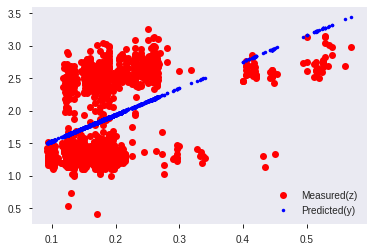

In [33]:
plt.plot(x,z,'ro',label='Measured(z)')   #ro red oval
plt.plot(x,np.polyval(p1,x),'b.',label="Predicted(y)")  #blue dot
plt.legend();plt.grid()
plt.show()

In [34]:
x_columns=data.columns[0:-1]
z_column=data.columns[-1]
print(x)
print(z)
x=data[x_columns]
z=data[z_column]

[0.153 0.153 0.153 ... 0.25  0.185 0.185]
[1.22377543 1.16315081 1.16315081 ... 2.43361336 2.60268969 2.50959926]


In [35]:
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(z,xc).fit()
predictions=model.predict(xc)
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnMFR   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     297.2
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          1.21e-321
Time:                        17:24:28   Log-Likelihood:                -1610.8
No. Observations:                2465   AIC:                             3238.
Df Residuals:                    2457   BIC:                             3284.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9165      1.617     -7.989      0.000     -16.087      -9.746
C3=        -5.201e-05   6.78e-06     -7.669      0.000   -6.53e-05   -3.87e-05
H2R            3.4113      0.158     21.640      0.000       3.102       3.720
Pressure       0.4165      0.024     17.295      0.000       0.369       0.464
Level         -0.0428      0.011     -3.913      0.000      -0.064      -0.021
C2=         1.061e-05   1.05e-06     10.090      0.000    8.54e-06    1.27e-05
Cat           -4.5690      0.249    -18.349      0.000      -5.057      -4.081
Temp           0.0775      0.013      6.164      0.000       0.053       0.102
==============================================================================
Omnibus:                       60.301   Durbin-Watson:                   0.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.929
Skew:                           0.361   Prob(JB):                     4.83e-15
Kurtosis:                       3.348   Cond. No.                     8.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<BarContainer object of 7 artists>

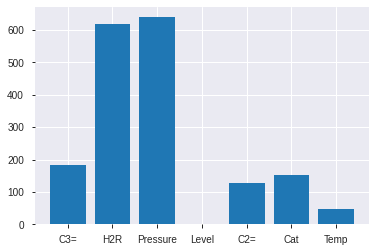

In [36]:
#select best feature. Plot feature weights
from sklearn.feature_selection import SelectKBest,f_regression
best=SelectKBest(score_func=f_regression,k="all")
fit=best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)

Machine Learning

In [50]:
def fit(method):
  #create points for plotting surface
  xp=np.arange(-5,5,0.2)
  yp=np.arange(-5,5,0.2)
  XP,YP=np.meshgrid(xp,yp)
  
  model=method.fit(train[['H2R','Pressure']],train['lnMFR'])
  zp=method.predict(np.vstack((XP.flatten(),YP.flatten())).T)
  ZP=zp.reshape(np.size(XP,0),np.size(XP,1))

  r2=method.score(test[['H2R','Pressure']],test['lnMFR'])
  print('R^2: '+str(r2))

  fig=plt.figure()
  ax=fig.add_subplot(111,projection='3d')
  ax.scatter(ds['H2R'],ds['Pressure'],ds['lnMFR'],c=z,cmap='plasma', label='data')
  ax.plot_surface(XP,YP,ZP,cmap='coolwarm',alpha=0.7,linewidth=0,antialiased=False)
  
  plt.show()
  return

Linear Regressio is not expected to perform very well with nonlinear data but it helps predict the slope of the data

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


R^2: 0.30455749613789906


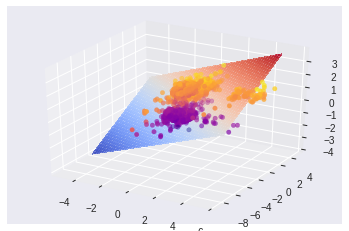

In [51]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
fit(lm)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


R^2: 0.5933714436569406


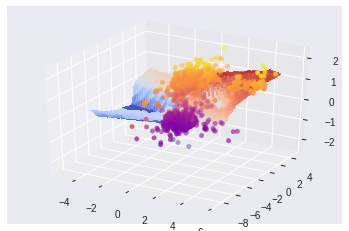

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=20)
fit(knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


R^2: 0.5323282576721534


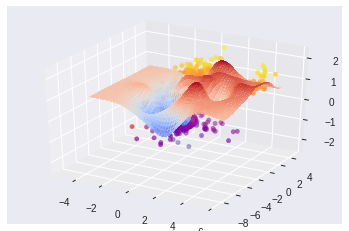

In [53]:
from sklearn import svm
s=svm.SVR(gamma='scale')
fit(s)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


R^2: 0.5376026662160707


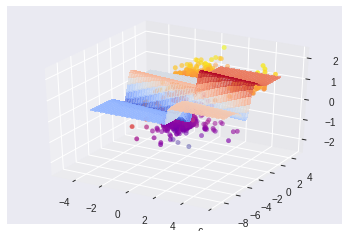

In [55]:
from sklearn.neural_network import MLPRegressor
#activation{'identity','logistic','tanh','relu'},default='relu'
nn=MLPRegressor(hidden_layer_sizes=(3),
                activation='tanh',solver='lbfgs')
fit(nn)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


R^2: 0.4210810360766497


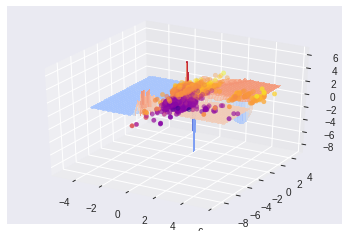

In [58]:
from sklearn.neural_network import MLPRegressor
#activation{'identity','logistic','tanh','relu'},default='relu'
nn=MLPRegressor(hidden_layer_sizes=(5,3,5,10,20),
                activation='tanh',solver='lbfgs',max_iter=10000)
fit(nn)

Additional Features

In [59]:
def fitn(method):
  f=train.columns
  model=method.fit(train[f[0:-1]],train['lnMFR'])
  r2=method.score(test[f[0:-1]],test['lnMFR'])
  print('R^2: '+ str(r2))

  MFR_pred=method.predict(test[f[0:-1]])
  plt.plot(test['lnMFR'], MFR_pred, 'b.')  #predicted values are blue dot
  plt.plot([-1,2],[-1,2],'k-')

  return

R^2: 0.43358726592907615


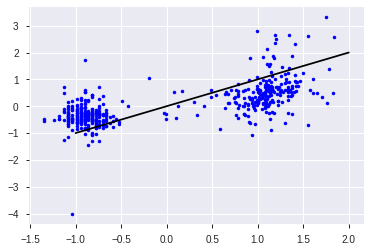

In [60]:
#linear_model
fitn(lm)

R^2: 0.7285216097878904


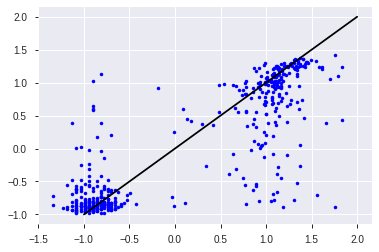

In [61]:
fitn(knn)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


R^2: 0.4662500536188644


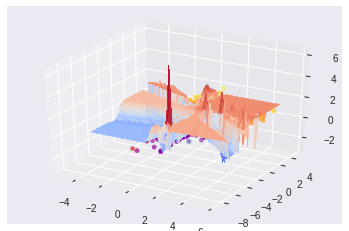

In [62]:
fit(nn)

Repeat the neural network fit but use TensorFlow and Keras instead of Scikit-learn

In [66]:
#optimizer used adam

In [69]:
#!pip install tensorflow
from keras.models import Sequential #when data size is large
from keras.layers import *
f=train.columns
n_inputs=len(f)-1
nodes=10

model=Sequential()
model.add(Dense(n_inputs,input_dim=n_inputs,activation='linear'))
model.add(Dense(nodes,activation='linear'))
model.add(Dense(nodes,activation='tanh'))
model.add(Dense(nodes,activation='tanh'))
model.add(Dense(nodes,activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

X1=train.drop('lnMFR',axis=1).values
Y1=train[['lnMFR']].values

model.fit(X1,Y1,epochs=300,verbose=1,shuffle=True)

#save the model to hard drive
#model.save('model.h5')
#load the model from hard drive
#model.load('model.h5')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/300
62/62 [==============================] - 2s 7ms/step - loss: 0.8308
Epoch 2/300
62/62 [==============================] - 0s 6ms/step - loss: 0.4277
Epoch 3/300
62/62 [==============================] - 0s 8ms/step - loss: 0.3676
Epoch 4/300
62/62 [==============================] - 0s 4ms/step - loss: 0.3464
Epoch 5/300
62/62 [==============================] - 0s 5ms/step - loss: 0.3335
Epoch 6/300
62/62 [==============================] - 0s 5ms/step - loss: 0.3259
Epoch 7/300
62/62 [==============================] - 0s 6ms/step - loss: 0.3214
Epoch 8/300
62/62 [==============================] - 0s 6ms/step - loss: 0.3177
Epoch 9/300
62/62 [==============================] - 0s 6ms/step - loss: 0.3128
Epoch 10/300
62/62 [==============================] - 0s 4ms/step - loss: 0.3112
Epoch 11/300
62/62 [==============================] - 0s 4ms/step - loss: 0.3076
Epoch 12/300
62/62 

In [81]:
X2=test.drop('lnMFR',axis=1).values
Y2=test[['lnMFR']].values

mse=model.evaluate(X2,Y2,verbose=1)
print('Mean Squared Error: ',mse)


16/16 [==============================] - 0s 2ms/step - loss: 0.2616
Mean Squared Error:  0.26164060831069946


16/16 [==============================] - 0s 2ms/step


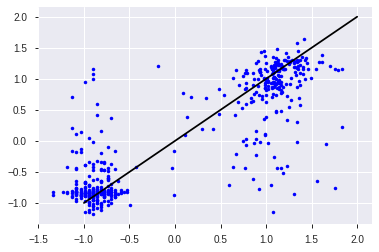

In [71]:
lnMFR_pred=model.predict(X2)
plt.plot(test['lnMFR'],lnMFR_pred, 'b.')
plt.plot([-1,2],[-1,2], 'k-')

Tensorflow Linear Regression

In [72]:
data_X=np.array(data['H2R'])
data_Y=np.array(data['lnMFR'])
display_step=100
learning_rate=0.01
epochs=1000

In [83]:
#Weight and Bias
w=tf.Variable(tf.zeros(1),name='weight')
b=tf.Variable(tf.zeros(1),name='bias')

def predict(x):
  return x*w +b

def mse(y_true, y_pred):
  return tf.losses.mean_squared_error(y_true, y_pred)
# SDG optimizer
#tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs)

optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

In [85]:
import time
history =[]
start=time.time()

#start training
for epoch in range(1,epochs+1):
  #Begin GradientTape and optimise
  with tf.GradientTape() as g:
    pred=predict(data_X)
    loss=mse(data_Y,pred)
  
  #Compute dw,db
  gradients=g.gradient(loss,[w,b])

  #Update w and b
  optimizer.apply_gradients(zip(gradients,[w,b]))

  #Monitor training/display steps
  if epoch % display_step==0:
    pred=predict(data_X)
    loss=mse(data_Y,pred)
    history.append(np.array(w*data_X +b))
    print('Epoch: %i, Loss:%f, w:%f, b:%f'% (epoch,loss,w.numpy(), b.numpy()))

print('Train Time: %f second' %(time.time()-start))

  

Epoch: 100, Loss:0.374300, w:0.701685, b:1.751262
Epoch: 200, Loss:0.373284, w:0.733034, b:1.745457
Epoch: 300, Loss:0.372286, w:0.764092, b:1.739706
Epoch: 400, Loss:0.371307, w:0.794861, b:1.734008
Epoch: 500, Loss:0.370346, w:0.825345, b:1.728363
Epoch: 600, Loss:0.369403, w:0.855545, b:1.722770
Epoch: 700, Loss:0.368477, w:0.885464, b:1.717230
Epoch: 800, Loss:0.367568, w:0.915106, b:1.711741
Epoch: 900, Loss:0.366676, w:0.944471, b:1.706303
Epoch: 1000, Loss:0.365801, w:0.973564, b:1.700915
Train Time: 3.867944 second


Pytorch Linear Regression

In [86]:
data_X=data_X.reshape(len(data_X),1)
data_Y=data_Y.reshape(len(data_Y),1)

In [88]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self,inputSize,outputSize):
      super(linearRegression,self).__init__()
      self.linear=torch.nn.Linear(inputSize,outputSize)
    
    def forward(self,x):
      out=self.linear(x)
      return out



In [89]:
inputDim=1
outputDim=1
learningRate=0.01
epochs=100
model=linearRegression(inputDim,outputDim)

In [90]:
criterion=torch.nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learningRate)

In [93]:
for epoch in range(epochs):
  inputs=Variable(torch.from_numpy(data_X).float())
  labels=Variable(torch.from_numpy(data_Y).float())

  #Clear gradient buffers to remove gradient from pervious epoch to carry forward
  optimizer.zero_grad()
  outputs=model(inputs)
  loss=criterion(outputs,labels)
  print(loss)
  #get gradients w.r.t to parameters
  loss.backward()

  #update parameters
  optimizer.step()

tensor(3.5442, grad_fn=<MseLossBackward0>)
tensor(3.4139, grad_fn=<MseLossBackward0>)
tensor(3.2889, grad_fn=<MseLossBackward0>)
tensor(3.1690, grad_fn=<MseLossBackward0>)
tensor(3.0540, grad_fn=<MseLossBackward0>)
tensor(2.9438, grad_fn=<MseLossBackward0>)
tensor(2.8380, grad_fn=<MseLossBackward0>)
tensor(2.7366, grad_fn=<MseLossBackward0>)
tensor(2.6394, grad_fn=<MseLossBackward0>)
tensor(2.5461, grad_fn=<MseLossBackward0>)
tensor(2.4566, grad_fn=<MseLossBackward0>)
tensor(2.3708, grad_fn=<MseLossBackward0>)
tensor(2.2885, grad_fn=<MseLossBackward0>)
tensor(2.2096, grad_fn=<MseLossBackward0>)
tensor(2.1339, grad_fn=<MseLossBackward0>)
tensor(2.0613, grad_fn=<MseLossBackward0>)
tensor(1.9917, grad_fn=<MseLossBackward0>)
tensor(1.9249, grad_fn=<MseLossBackward0>)
tensor(1.8609, grad_fn=<MseLossBackward0>)
tensor(1.7994, grad_fn=<MseLossBackward0>)
tensor(1.7405, grad_fn=<MseLossBackward0>)
tensor(1.6840, grad_fn=<MseLossBackward0>)
tensor(1.6299, grad_fn=<MseLossBackward0>)
tensor(1.57

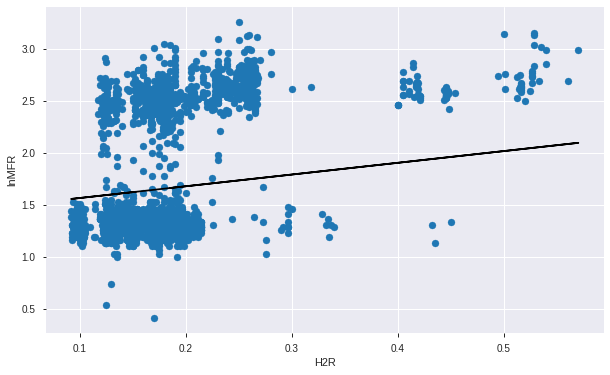

In [95]:
with torch.no_grad(): #we don't need gradients in the testing phase
    predicted=model(Variable(torch.from_numpy(data_X).float())).data.numpy()

fig=plt.figure(figsize=(10,6))
plt.scatter(data_X,data_Y)
plt.plot(data_X,predicted,'k')
plt.xlabel('H2R')
plt.ylabel('lnMFR')
plt.show()